In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

### 读入数据
展示数据样子

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


#### 加个通道

In [3]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


### 构建网络

In [4]:
model=keras.Sequential()

model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
                       activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

模型的样子

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=keras.optimizers.Adam(),
             # loss=keras.losses.CategoricalCrossentropy(),  # 需要使用to_categorical
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### 模型训练

In [7]:
history=model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 96us/sample - loss: 1.4546 - accuracy: 0.5286 - val_loss: 0.6101 - val_accuracy: 0.8568
Epoch 2/5
54000/54000 [==============================] - 3s 57us/sample - loss: 0.4202 - accuracy: 0.9102 - val_loss: 0.2415 - val_accuracy: 0.9470
Epoch 3/5
54000/54000 [==============================] - 3s 59us/sample - loss: 0.1817 - accuracy: 0.9517 - val_loss: 0.1368 - val_accuracy: 0.9665
Epoch 4/5
54000/54000 [==============================] - 3s 63us/sample - loss: 0.1250 - accuracy: 0.9640 - val_loss: 0.1447 - val_accuracy: 0.9608
Epoch 5/5
54000/54000 [==============================] - 3s 58us/sample - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.1244 - val_accuracy: 0.9693


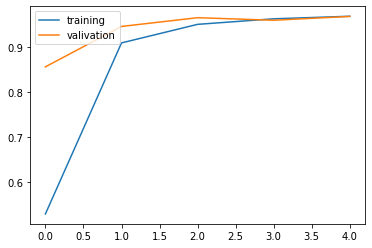

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [9]:
res = model.evaluate(x_test, y_test)
print(res)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.1239 - accuracy: 0.9658
[0.12385772593505681, 0.9658]


(28, 28, 1)
7


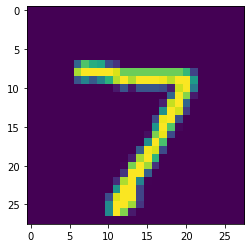

In [23]:
result=model.predict(x_test[0].reshape((-1,28,28,1)))
print(x_test[0].shape)
plt.imshow(x_test[0].reshape((28,28)))
print(np.argmax(result))

In [24]:
model.save('./cnn.h5')